# Case_I_v1 : Using chemical analysis to determine the quality wines

In [1]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# Import dataset

wines = pd.read_csv("winequality.csv", sep = ';')

## Checking data

In [3]:
# Checking the data format
shape = wines.shape
print('Numbers of lines and columns: {0}'.format(shape))

Numbers of lines and columns: (1599, 12)


In [4]:
# Checking the first five lines
wines.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Checking the last five lines
wines.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
# Checking missing datas
wines.isnull().values.any()

False

In [7]:
# Missing hidden values
print("# Lines in dataframe {0}".format(len(wines)))
print("# Lines missing fixed acidity: {0}".format(len(wines.loc[wines['fixed acidity'] == 0])))
print("# Lines missing volatile acidity: {0}".format(len(wines.loc[wines['volatile acidity'] == 0])))
print("# Lines missing citric acid: {0}".format(len(wines.loc[wines['citric acid'] == 0])))
print("# Lines missing residual sugar: {0}".format(len(wines.loc[wines['residual sugar'] == 0])))
print("# Lines missing chlorides: {0}".format(len(wines.loc[wines['chlorides'] == 0])))
print("# Lines missing total sulfur dioxide: {0}".format(len(wines.loc[wines['total sulfur dioxide'] == 0])))
print("# Lines missing density: {0}".format(len(wines.loc[wines['density'] == 0])))
print("# Lines missing pH: {0}".format(len(wines.loc[wines['pH'] == 0])))
print("# Lines missing sulphates: {0}".format(len(wines.loc[wines['sulphates'] == 0])))
print("# Lines missing alcohol: {0}".format(len(wines.loc[wines['alcohol'] == 0])))

# Lines in dataframe 1599
# Lines missing fixed acidity: 0
# Lines missing volatile acidity: 0
# Lines missing citric acid: 132
# Lines missing residual sugar: 0
# Lines missing chlorides: 0
# Lines missing total sulfur dioxide: 0
# Lines missing density: 0
# Lines missing pH: 0
# Lines missing sulphates: 0
# Lines missing alcohol: 0


In [8]:
# Treating missing missing values ​​found

## from sklearn.impute import SimpleImputer
## ocultos = SimpleImputer(missing_values = 0, strategy = "mean")

In [9]:
# Substituting values equal to zero, by the mean of the data

## X_treino = ocultos.fit_transform(X_treino)
## X_teste = ocultos.fit_transform(X_teste)

# CONCLUSION = MAY BE VALUES = 0 IN THIS ATTRIBUTE, THEREFORE, THE TREATMENT WAS NOT EXECUTED

## Exploratory data analyzis

In [10]:
# Identifying correlation between variables

def plot_corr(wines, size = 10):
    corr = wines.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

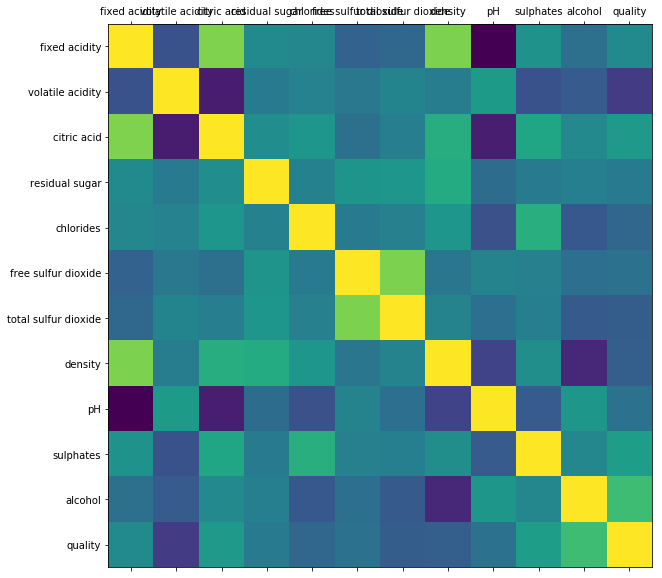

In [11]:
# Plot correlation

plot_corr(wines)

In [12]:
# Viewing the correlation in table
# Correlation Coefficient:
# +1 = strong positive correlation
# 0 = no correlation
# -1 = strong negative correlation

wines.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## Data Splitting

In [13]:
# Splitting of data - 75% for training data and 25% for test data
# Importing the train_test_split

from sklearn.model_selection import train_test_split

In [14]:
# Variable Predictor(Feature Selection)

atributos = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [15]:
# Variable target

atrib_prev = ['quality']

In [16]:
# Creating objects

X = wines[atributos].values
Y = wines[atrib_prev].values

In [17]:
# Setting split rate
split_test_size = 0.25

In [18]:
# Creating test data and train data

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [19]:
# Printing results

print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(wines.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(wines.index)) * 100))

74.98% nos dados de treino
25.02% nos dados de teste


## Building and training REGRESSION MODEL

In [20]:
# Choice of algorithms was decided with the help of FlowChart from ScikitLearn (Regression algorithms)

#Lasso
#RidgeRegression e SVR'linear'

## Using Lasso Regression

In [21]:
# Importing the linear model 'Lasso'
from sklearn.linear_model import Lasso
#Creating a predict model
modelo_lasso = Lasso(random_state= 42)
# Trainning the model
modelo_lasso.fit(X_treino, Y_treino.ravel())

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
# Predicting Y based on training data X
lasso_predict_train = (modelo_lasso.predict(X_treino))
#### EXECPT 1 Rounding up the predicted training numbers to satisfy the problem
round_lasso_predict_train = np.round(lasso_predict_train)

## Checking accuracy Lasso model in training data

In [23]:
# Importing package metrics
from sklearn import metrics

In [24]:
# Checking accuracy for AVERAGE SQUARE ERROR
from sklearn.metrics import mean_squared_error

# Checking accuracy for AVERAGE SQUARE ERROR
print("Erro quadrado médio (mean_squared_error): {0:.4f}".format(metrics.mean_squared_error(Y_treino, lasso_predict_train)))
print()

Erro quadrado médio (mean_squared_error): 0.6345



In [25]:
# Checking accuracy for EXPLAINED VARIANCE SCORE
from sklearn.metrics import explained_variance_score

# Checking for accuracy by explained_variance
print("Explained variance: {0:.4f}".format(metrics.explained_variance_score(Y_treino, lasso_predict_train)))
print()

Explained variance: 0.0424



In [26]:
explain_Lasso = metrics.explained_variance_score(Y_treino, lasso_predict_train)

## Verifying the accuracy of the Lasso model in the test data

In [27]:
# Predicting Y based on test data X
lasso_predict_test = modelo_lasso.predict(X_teste)

#round_Y_teste = np.round(Y_teste)
round_lasso_predict_test = np.round(lasso_predict_test)

In [28]:
# Checking accuracy for AVERAGE SQUARE ERROR
print("Erro quadrado médio (mean_squared_error): {0:.4f}".format(metrics.mean_squared_error(Y_teste, lasso_predict_test)))
print()

# Checking for accuracy by explained_variance
print("Explained variance: {0:.4f}".format(metrics.explained_variance_score(Y_teste, lasso_predict_test)))
print()

Erro quadrado médio (mean_squared_error): 0.6150

Explained variance: 0.0073



## Using Ridge Regression

In [29]:
# Importing the linear model 'Ridge Regression'
from sklearn.linear_model import Ridge
#Creating a predict model
ridge_model = Ridge(random_state = 42)
# Trainning the model
ridge_model.fit(X_treino, Y_treino.ravel())

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

In [30]:
# Predicting Y based on training data X
ridge_predict_train = (ridge_model.predict(X_treino))
#### EXECPT 2 Rounding up the predicted training numbers to satisfy the problem
round_ridge_predict_train = np.round(ridge_predict_train)

## Checking accuracy Ridge Regression model in training and test data

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [32]:
# Predicting Y based on test data X
ridge_predict_test = ridge_model.predict(X_teste)
round_ridge_predict_test = np.round(ridge_predict_test)

In [33]:
# Checking accuracy for AVERAGE SQUARE ERROR for train data
print('========train data========')
print("Erro quadrado médio (mean_squared_error): {0:.4f}".format(metrics.mean_squared_error(Y_treino, ridge_predict_train)))
print()
# Checking for accuracy by explained_variance
print("Explained variance: {0:.4f}".format(metrics.explained_variance_score(Y_treino, ridge_predict_train)))
print()
# Checking accuracy for AVERAGE SQUARE ERROR
print('========test data========')
print("Erro quadrado médio (mean_squared_error): {0:.4f}".format(metrics.mean_squared_error(Y_teste, ridge_predict_test)))
print()

# Checking for accuracy by explained_variance
print("Explained variance: {0:.4f}".format(metrics.explained_variance_score(Y_teste, ridge_predict_test)))
print()

========train data========
Erro quadrado médio (mean_squared_error): 0.4282

Explained variance: 0.3537

========test data========
Erro quadrado médio (mean_squared_error): 0.3910

Explained variance: 0.3681



In [34]:
explain_RP = metrics.explained_variance_score(Y_teste, ridge_predict_test)

## Using Suport Vector Regression

In [35]:
# Importing the SVM model 'Suport Vector Regression'
from sklearn.svm import SVR
#Creating a predict model
SVR_model = SVR()
# Trainning the model
SVR_model.fit(X_treino, Y_treino.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
# Predicting Y based on training data X
SVR_predict_train = (SVR_model.predict(X_treino))
round_SVR_predict_train = np.round(SVR_predict_train)

In [37]:
# Predicting Y based on test data X
SVR_predict_test = SVR_model.predict(X_teste)
round_SVR_predict_test = np.round(SVR_predict_test)

In [38]:
# Checking accuracy for AVERAGE SQUARE ERROR for train data
print('========train data========')
print("Erro quadrado médio (mean_squared_error): {0:.4f}".format(metrics.mean_squared_error(Y_treino, SVR_predict_train)))
print()
# Checking for accuracy by explained_variance
print("Explained variance: {0:.4f}".format(metrics.explained_variance_score(Y_treino, SVR_predict_train)))
print()
print('========test data========')
# Checking accuracy for AVERAGE SQUARE ERROR for test data
print("Erro quadrado médio (mean_squared_error): {0:.4f}".format(metrics.mean_squared_error(Y_teste, SVR_predict_test)))
print()
# Checking for accuracy by explained_variance
print("Explained variance: {0:.4f}".format(metrics.explained_variance_score(Y_teste, SVR_predict_test)))
print()

explain_SVR = metrics.explained_variance_score(Y_teste, SVR_predict_test)

========train data========
Erro quadrado médio (mean_squared_error): 0.2361

Explained variance: 0.6436

========test data========
Erro quadrado médio (mean_squared_error): 0.4500

Explained variance: 0.2726



## Building [Data Splitting and Classification Model]

### Data Splitting and Preprocessing

In [39]:
# Creating classes of quality
# 1-4 = Bad wines
# 5-6 = Medium wines
# 7-10 = Good wines

classes = []
for i in wines['quality']:
    if i >= 1 and i <= 4:
        classes.append('1')
    elif i >= 5 and i <= 6:
        classes.append('2')
    elif i >= 7 and i <= 10:
        classes.append('3')
wines['classes'] = classes

In [40]:
# Defing X2 = predictive variables Y2 = variavel target
atributos2 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
classes_pred = ['classes']

X2 = wines[atributos2].values
Y2 = wines[classes_pred].values

In [41]:
# Using Standard scaler in predictive variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2 = sc.fit_transform(X2)

In [42]:
# Using PCA technique in predictive variables
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X2)

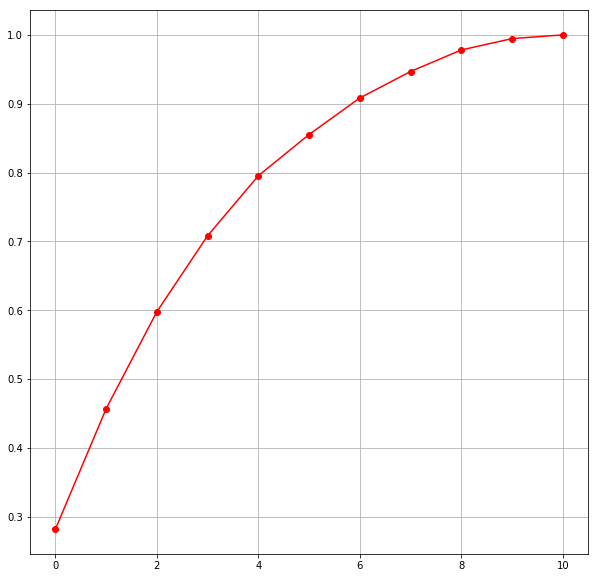

In [43]:
# Plot the graph to find the principal components "8 in this case"
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [44]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(X2)

In [45]:
# Setting split rate
split_test_size2 = 0.25

In [46]:
# Creating test data and train data
from sklearn.model_selection import train_test_split
X_treino2, X_teste2, Y_treino2, Y_teste2 = train_test_split(x_new, Y2, test_size = split_test_size2, random_state = 42)

## KNN / SVM / Naive Bayes / DecisionTree / GradientBoosting / RandomForest / SGDC

In [47]:
# Importing Classifier modules
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

C:\Users\Mãe\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [48]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_treino2, Y_treino2.ravel())
KNN_predict_test = model_KNN.predict(X_teste2)
    
acc_KNN = accuracy_score(Y_teste2, KNN_predict_test)
print(acc_KNN)
print(confusion_matrix(Y_teste2, KNN_predict_test))

0.8525
[[  2  12   0]
 [  3 314  16]
 [  0  28  25]]


In [49]:
print(acc_KNN)

0.8525


In [50]:
model_SVC = SVC()
model_SVC.fit(X_treino2, Y_treino2.ravel())
SVC_predict_test = model_SVC.predict(X_teste2)
    
acc_SVC = accuracy_score(Y_teste2, SVC_predict_test)
print(acc_SVC)
print(confusion_matrix(Y_teste2, SVC_predict_test))

0.85
[[  0  14   0]
 [  0 324   9]
 [  0  37  16]]


In [51]:
model_NB = GaussianNB()
model_NB.fit(X_treino2, Y_treino2.ravel())
NB_predict_test = model_NB.predict(X_teste2)

acc_NB = accuracy_score(Y_teste2, NB_predict_test)
print(acc_NB)
print(confusion_matrix(Y_teste2, NB_predict_test))

0.7925
[[  0  14   0]
 [  8 300  25]
 [  0  36  17]]


In [52]:
model_XG = GradientBoostingClassifier()
model_XG.fit(X_treino2, Y_treino2.ravel())
XG_predict_test = model_XG.predict(X_teste2)

acc_XG = accuracy_score(Y_teste2, XG_predict_test)
print(acc_XG)
print(confusion_matrix(Y_teste2, XG_predict_test))

0.865
[[  1  13   0]
 [  0 320  13]
 [  0  28  25]]


In [53]:
model_SDG = SGDClassifier()
model_SDG.fit(X_treino2, Y_treino2.ravel())
SDG_predict_test = model_SDG.predict(X_teste2)

acc_SDG = accuracy_score(Y_teste2, SDG_predict_test)
print(acc_SDG)
print(confusion_matrix(Y_teste2, SDG_predict_test))

0.7425
[[  9   5   0]
 [ 46 281   6]
 [  5  41   7]]


C:\Users\Mãe\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [54]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_treino2, Y_treino2.ravel())
DT_predict_test = model_DT.predict(X_teste2)

acc_DT = accuracy_score(Y_teste2, DT_predict_test)
print(acc_DT)
print(confusion_matrix(Y_teste2, DT_predict_test))

0.765
[[  2  12   0]
 [ 17 274  42]
 [  1  22  30]]


In [55]:
model_RF = RandomForestClassifier()
model_RF.fit(X_treino2, Y_treino2.ravel())
RF_predict_test = model_RF.predict(X_teste2)

acc_RF = accuracy_score(Y_teste2, RF_predict_test)
print(acc_RF)
print(confusion_matrix(Y_teste2, RF_predict_test))

0.88
[[  0  14   0]
 [  2 327   4]
 [  0  28  25]]


## Resume

In [57]:
accuracy = [acc_KNN, acc_SVC, acc_NB, acc_XG, acc_SDG, acc_DT, acc_RF]
classifier = ['KNearestNeightbors','Support Vector Machine','Naive Bayes','Gradient Booster', 'SGDClassifier','Decision Tree','Random Forest']
explain = [explain_SVR, explain_RP, explain_Lasso]
regression = ['Support Vector Regression', 'Ridge Regression', 'Lasso Regression']

In [58]:
c={'Classifier Model':classifier,'Accuracy':accuracy}
r={'Regression Model':regression, 'Explained Variance':explain}

In [60]:
acc_df=pd.DataFrame(c)
acc_df

,Classifier Model,Accuracy
0,KNearestNeightbors,0.8525
1,Support Vector Machine,0.8500
2,Naive Bayes,0.7925
3,Gradient Booster,0.8650
4,SGDClassifier,0.7425
5,Decision Tree,0.7650
6,Random Forest,0.8800


In [61]:
exp_df=pd.DataFrame(r)
exp_df

,Regression Model,Explained Variance
0,Support Vector Regression,0.272630
1,Ridge Regression,0.368100
2,Lasso Regression,0.042355
